<a href="https://colab.research.google.com/github/aashrithresearch/melanoma-cancer/blob/main/melanoma_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *
from fastai.callback.fp16 import *
from fastai.vision.widgets import *
import torch
import os
from fastai.vision.models import *
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/melanoma_cancer_dataset'

In [4]:
print(os.listdir(path+'/train'))

['benign', 'malignant']


In [5]:
melanoma = DataBlock(blocks = (ImageBlock, CategoryBlock),
                     get_items=get_image_files,
                     get_y=parent_label,
                     splitter = RandomSplitter(seed=42),
                     item_tfms=Resize(460),
                     batch_tfms=aug_transforms(size=224, min_scale=0.5))
dls = melanoma.dataloaders(path+'/train', bs=64)

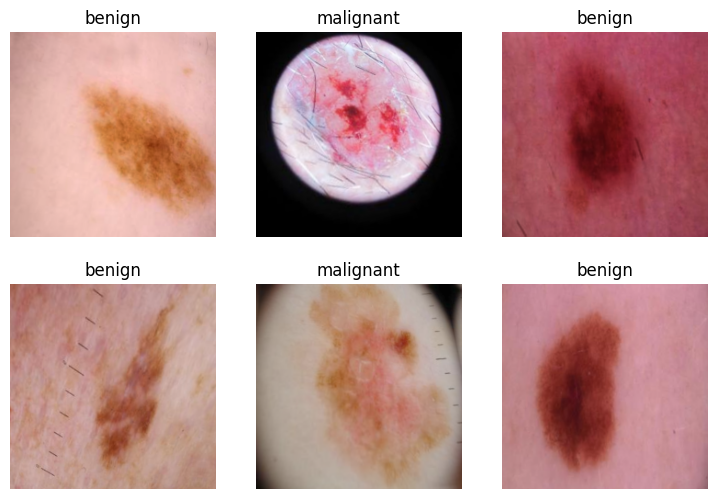

In [6]:
dls.show_batch(max_n=6)

In [9]:
learn = vision_learner(dls, resnet34, metrics=accuracy).to_fp16()
learn.fine_tune(10, freeze_epochs=3)

epoch,train_loss,valid_loss,accuracy,time
0,0.509713,0.300404,0.896104,10:22
1,0.430978,0.269812,0.905455,01:36
2,0.299908,0.264858,0.900779,01:32


epoch,train_loss,valid_loss,accuracy,time
0,0.228016,0.200347,0.927792,01:38
1,0.203532,0.201534,0.928312,01:35
2,0.186312,0.185672,0.925195,01:39
3,0.162152,0.199808,0.935065,01:35
4,0.149277,0.184710,0.925714,01:36
5,0.129854,0.185678,0.936623,01:36
6,0.099320,0.186490,0.940260,01:36
7,0.075743,0.186155,0.942338,01:33


epoch,train_loss,valid_loss,accuracy,time
0,0.228016,0.200347,0.927792,01:38
1,0.203532,0.201534,0.928312,01:35
2,0.186312,0.185672,0.925195,01:39
3,0.162152,0.199808,0.935065,01:35
4,0.149277,0.184710,0.925714,01:36
5,0.129854,0.185678,0.936623,01:36
6,0.099320,0.186490,0.940260,01:36
7,0.075743,0.186155,0.942338,01:33
8,0.057877,0.199179,0.941299,01:35
9,0.048170,0.208392,0.942338,01:31


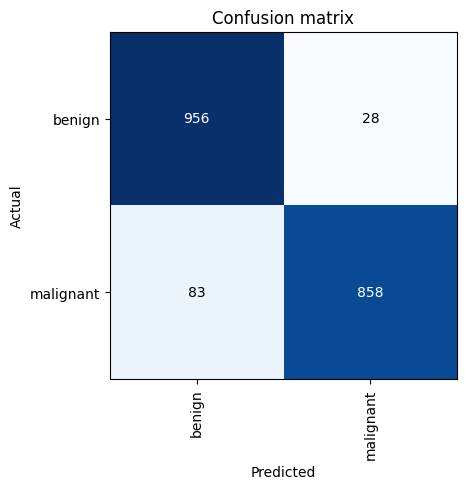

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [11]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]